## Load libraries

In [1]:
# Import the required libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import pandas as pd
from osgeo_utils import gdal_pansharpen
currentDir = os.path.abspath(os.getcwd())
sys.path.append(os.path.join(currentDir, "general_utils"))
from file_management import save_lzma, save_pickle, load_lzma, load_pickle
from gdal_utils import getMultiRasterBands

## Pansharpen the raster

In [2]:
# Perform the pansharpening of the multispectral raster using the panchromatic gray scale image
panchro_tif_file = 'Data/Satellite/Puigpunyent_panchromatic.tif'
multi_tif_file = 'Data/Satellite/Puigpunyent_multispectral.tif'
multipan_tif_file = 'Data/Satellite/Puigpunyent_pansharpened.tif'

gdal_pansharpen.gdal_pansharpen(['', '-b', '1', '-b', '2', '-b', '3', '-b', '4', 
                                 '-b', '5', '-b', '6', '-b', '7', '-b', '8',
                                 panchro_tif_file, multi_tif_file, multipan_tif_file])
# help(gdal_pansharpen)

0...10...20...30...40...50...60...70...80...90...100 - done.


0

## Load the raster file with preprocessing

In [3]:
# manual_sample_dir = 'Almonds_Sample'
metadata_file = 'Data/Satellite/metadata.IMD'
df, _ = getMultiRasterBands(multipan_tif_file, 
                            metadata_file,
                            TOA=True,
                            vegetation_indices=True,
                            plot_band_images=False,
                            save_dataframe=True,
                            save_file='Processed Data'
                           )
df

,C,B,G,Y,R,RE,N,N2,NDVI_1,NDVI_2,...,NPQI_2,NPQI_3,NPQI_4,NPQI_5,CLR,CLG,BNDVI,CTR1,Lats,Longs
0,107.657256,105.357193,97.342775,88.541732,95.685622,89.459027,104.274182,74.274037,0.042951,-0.125980,...,0.013481,0.016159,0.018830,0.021494,0.165608,0.071206,-0.005166,0.888799,39.618415,2.581034
1,91.784712,90.587493,83.710526,75.313386,82.156806,76.768693,90.458675,64.378593,0.048095,-0.121324,...,0.008195,0.009820,0.011441,0.013058,0.178328,0.080613,-0.000712,0.895103,39.618415,2.581040
2,83.503385,82.710320,76.681398,67.729134,75.269409,70.345190,84.702214,59.954747,0.058965,-0.113254,...,0.005955,0.007136,0.008312,0.009486,0.204094,0.104599,0.011898,0.901394,39.618415,2.581046
3,84.193495,85.336044,78.811437,66.670866,77.237237,72.381910,90.787616,63.680091,0.080645,-0.096206,...,-0.008412,-0.010080,-0.011742,-0.013400,0.254286,0.151960,0.030953,0.917378,39.618415,2.581052
4,81.433053,84.351398,77.746417,62.437795,76.253323,71.598556,94.077022,65.309929,0.104642,-0.077304,...,-0.021971,-0.026325,-0.030667,-0.034995,0.313951,0.210050,0.054507,0.936393,39.618415,2.581058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781331,104.206703,77.787087,63.475157,53.618898,38.372640,67.525115,88.320561,57.626408,0.394243,0.200562,...,0.181211,0.217155,0.253001,0.288749,0.307966,0.391419,0.063414,0.368236,39.614759,2.586616
781332,97.650652,74.504931,61.771126,50.267717,36.158834,68.151798,95.228315,58.906995,0.449583,0.239289,...,0.167814,0.201086,0.234261,0.267340,0.397297,0.541632,0.122094,0.370288,39.614759,2.586622
781333,92.474823,72.207422,60.919111,48.327559,35.174920,68.621811,99.833483,59.954747,0.478923,0.260485,...,0.153604,0.184046,0.214396,0.244654,0.454836,0.638788,0.160578,0.380373,39.614759,2.586628
781334,89.714380,70.894560,60.493103,46.740157,33.945028,68.465140,101.807127,60.071164,0.499897,0.277890,...,0.146245,0.175221,0.204108,0.232906,0.486992,0.682954,0.178994,0.378368,39.614759,2.586634


### Save NRG image composition for visualization of the terrain

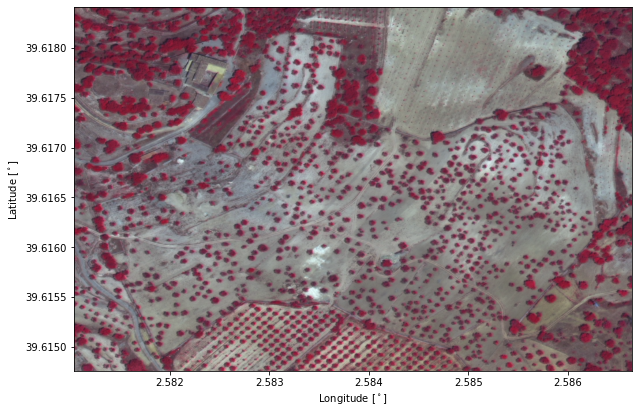

In [4]:
metadata_df = load_pickle('Processed Data/metadata_df.pkl')
pan_shape = metadata_df['original_shape'] 

rgb_df = (255*(df/df.max())).astype(np.uint8)
rgb = np.dstack((rgb_df['N'].values.reshape(pan_shape),rgb_df['R'].values.reshape(pan_shape),rgb_df['G'].values.reshape(pan_shape)))

fig, ax = plt.subplots(figsize=(10, 8))
plt.imshow(rgb,
          extent=[df['Longs'].min(), df['Longs'].max(), df['Lats'].min(), df['Lats'].max()])

ax.set_xlabel('Longitude [$^\circ$]')
ax.set_ylabel('Latitude [$^\circ$]')
ax.ticklabel_format(useOffset=False)
fig.savefig(os.path.join('Images', 'Satellite_imagery', 'nir_red_green.png'), dpi=400, transparent=True)